In [1]:
pip install dowhy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.9/172.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 46.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.0/81.0 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.8 MB/s eta 0:00:00
  Attempting uninst

# Example 1 - Applying DoWhy On Simulated Dataset

In this example, we will create dummy dataset using DoWhy library and apply CausalModel on it. Furthermore, we will go through the 4 major steps of Causal AI.

## Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from dowhy import CausalModel
import dowhy.datasets

## Loading Sample Data From DoWhy

In [2]:
data = dowhy.datasets.linear_dataset(
            beta=10,
            num_common_causes=1,
            num_instruments=1,
            num_samples=10000,
            treatment_is_binary=True)
data

{'df':        Z0        W0     v0          y
 0     1.0  0.295307   True  10.955014
 1     0.0  1.235095   True  13.987634
 2     0.0  1.658024   True  15.345992
 3     0.0 -0.908320  False  -2.933957
 4     0.0  1.129816   True  13.643004
 ...   ...       ...    ...        ...
 9995  0.0  0.609099   True  11.971544
 9996  0.0  1.142351   True  13.699181
 9997  0.0  1.071491   True  13.437046
 9998  0.0  1.293661   True  14.171508
 9999  0.0 -0.274932  False  -0.898354
 
 [10000 rows x 4 columns],
 'treatment_name': ['v0'],
 'outcome_name': 'y',
 'common_causes_names': ['W0'],
 'instrument_names': ['Z0'],
 'effect_modifier_names': [],
 'frontdoor_variables_names': [],
 'dot_graph': 'digraph {v0->y;W0-> v0;Z0-> v0;W0-> y;}',
 'gml_graph': 'graph[directed 1node[ id "y" label "y"]node[ id "W0" label "W0"]node[ id "Z0" label "Z0"]node[ id "v0" label "v0"]edge[source "v0" target "y"]edge[ source "W0" target "v0"]edge[ source "Z0" target "v0"]edge[ source "W0" target "y"]]',
 'ate': 10.00027

## Step 1 Of Causal AI: Create a causal model from the data and given graph.

In [3]:
model = CausalModel(
            data=data["df"],
            treatment=data["treatment_name"],
            outcome=data["outcome_name"],
            graph=data["gml_graph"])

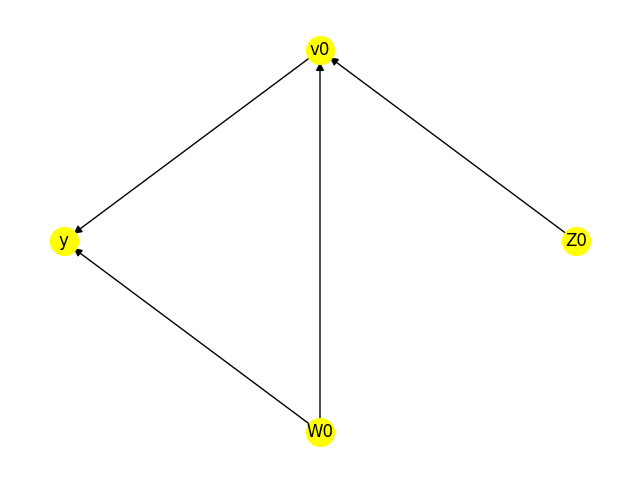

In [4]:
model.view_model()

## Step 2 Of Causal AI: Identify causal effect and return target estimands

In [5]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d           
─────(E[y|W0])
d[v₀]         
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,U) = P(y|v0,W0)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                      -1⎤
 ⎢  d      ⎛  d        ⎞  ⎥
E⎢─────(y)⋅⎜─────([v₀])⎟  ⎥
 ⎣d[Z₀]    ⎝d[Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z0})
Estimand assumption 2, Exclusion: If we remove {Z0}→{v0}, then ¬({Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



## Step 3 Of Causal AI: Estimate the target estimand using a statistical method.

In [6]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")
print(estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d           
─────(E[y|W0])
d[v₀]         
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,U) = P(y|v0,W0)

## Realized estimand
b: y~v0+W0
Target units: ate

## Estimate
Mean value: 10.512993287375462



## Step 4 Of Causal AI: Refute the obtained estimate using multiple robustness checks.

There are different methods supported by DoWhy package to refute (prove or disaprove) obtained results.

We will use two most popular methods:

1) Adding Random Common Cause

2) Using Subset of Data

In method 1, randomly-generated cofounder (e.g. independent variable) is added to data to check whether estimation remains almost same or gets changed after data is changed.

In method 2, random subset of data is removed to check whether estimation remains almost same after data is reduced.

Furthermore, P-Value plays important role in validating whether refute test passes or fails. If P-Value is less than 0.05 then it means test has failed.

In [7]:
refute_random_cause = model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause")
print(refute_random_cause)

Refute: Add a random common cause
Estimated effect:10.512993287375462
New effect:10.512993287375462
p value:2.0



In [8]:
refute_data_subset = model.refute_estimate(identified_estimand, estimate, method_name="data_subset_refuter")
print(refute_data_subset)

Refute: Use a subset of data
Estimated effect:10.512993287375462
New effect:10.518861369835967
p value:0.9199999999999999



As we can see in both refute tests, new effect is almost similar or nearer to estimated effect and p-value is also greater than 0.05 so we can conclude that both refute tests have passed.